In [1]:
# This notebook reads in .csvs containing correlation residuals from Fizeau
# grism PSFs and plots them as a function of OPD (or translation/piezo piston)
# to see if we really have passed over zero OPD

# created 2018 Dec 21 by E.S.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
% matplotlib inline

In [2]:
###################################

# Test residuals of grism scan

In [3]:
df = pd.read_csv("resids_test.csv")

In [4]:
df.keys()

Index(['Unnamed: 0', 'step', 'spc_trans_position', 'spc_trans_position_opd_um',
       'hpc_piezo_piston', 'hpc_piezo_piston_opd_um', 'fpc_piezo_piston',
       'fpc_piezo_piston_opd_um', 'resid'],
      dtype='object')

In [7]:
# coefficients of fit

coeffs = [1.09819684e+05, -8.94695081e+10,  1.82191771e+16]

In [8]:
y_series = coeffs[2] + coeffs[1]*df["spc_trans_position"] + coeffs[0]*df["spc_trans_position"]**2

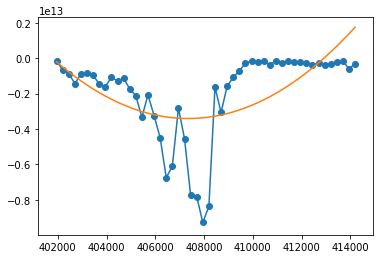

<Figure size 432x288 with 0 Axes>

In [10]:
## do I want np.abs(df["resid"]) instead?

plt.plot(df["spc_trans_position"],df["resid"])
plt.scatter(df["spc_trans_position"],df["resid"])
plt.plot(df["spc_trans_position"], y_series)
plt.show()
plt.savefig('scan_test_polyn.png')

In [23]:
df["spc_trans_position"]

0    416851.0
1    416876.0
2    416901.0
3    416926.0
Name: spc_trans_position, dtype: float64

# Test FFT quantities from a series of Fizeau Airy PSFs, to see of it makes sense to base a correction off a median

In [3]:
fftInfo_amp = pd.read_csv("fft_amp.csv")
fftInfo_arg = pd.read_csv("fft_arg.csv")

NameError: name 'pd' is not defined

In [4]:
fftInfo_amp.keys()

Index(['Unnamed: 0', 'step', 'spc_trans_position', 'spc_trans_position_opd_um',
       'hpc_piezo_piston', 'hpc_piezo_piston_opd_um', 'fpc_piezo_piston',
       'fpc_piezo_piston_opd_um', 'resid'],
      dtype='object')

In [4]:
fftInfo_arg.keys()

Index(['Unnamed: 0', 'step', 'spc_trans_position', 'spc_trans_position_opd_um',
       'hpc_piezo_piston', 'hpc_piezo_piston_opd_um', 'fpc_piezo_piston',
       'fpc_piezo_piston_opd_um', 'resid'],
      dtype='object')

# Overlap of the Airy PSF, or TT in Fizeau PSF: med_highFreqPerfect_R

In [4]:
plt.title("Overlap of the Airy PSF, or TT in \nFizeau PSF: med_highFreqPerfect_R")
plt.plot(fftInfo_arg["std_lowFreqPerfect"])
plt.axhline(np.median(fftInfo_arg["std_lowFreqPerfect"]), linestyle='--')
#plt.scatter(df["spc_trans_position"],df["resid"])
plt.show()
#plt.savefig('')

NameError: name 'plt' is not defined

# High-freq fringe visibility (median)

In [4]:
plt.title("Overlap of the Airy PSF, or TT in \nFizeau PSF: med_highFreqPerfect_R")
plt.plot(fftInfo_amp["med_highFreqPerfect_R"])
plt.axhline(np.median(fftInfo_amp["med_highFreqPerfect_R"]), linestyle='--')
#plt.scatter(df["spc_trans_position"],df["resid"])
plt.show()
#plt.savefig('')

NameError: name 'plt' is not defined

# Phase gradients

In [ ]:
x_grad = fftInfo_arg["phase_normVec_highFreqPerfect_R"][0]
y_grad = fftInfo_arg["phase_normVec_highFreqPerfect_R"][1]
sqrtx2y2 = np.sqrt(x_grad,2)+np.power(y_grad,2)

In [4]:
plt.title("Phase gradients of high freq node\nred: x; blue: y")
plt.plot(x_grad, color="red")
plt.plot(y_grad, color="blue")
plt.plot(sqrtx2y2, color="k")
plt.axhline(np.median(x_grad), linestyle='--')
plt.axhline(np.median(y_grad), linestyle=':')
#plt.scatter(df["spc_trans_position"],df["resid"])
plt.show()
#plt.savefig('')

NameError: name 'plt' is not defined